<a href="https://colab.research.google.com/github/abbasmehdi595/prediction/blob/main/TASK1%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SCIENCE AND BUISNESS ANALYTICS INTERNSHIP**

**The Sparks Foundation(GRIP)**

**TASK1: Predict the score based on No of study hours using SML**

**Submitted by: Syed Abbas Mehdi**

**Language: Python**

**IDE: Google Colaboratory** 

In [5]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics as m


In [6]:
#reading the data file
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print(df)
print("DATA IMPORTED SUCESSFULLY")

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
DATA IMPORTED SUCESSFULLY


In [7]:
#to get the first five row of dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [32]:
#checking if there are any null values in the dataset
df.isnull().sum()
df.isnull().transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Hours,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Scores,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


There are no null values in data

In [33]:
#checking the shape of dataset
df.shape

(25, 2)

Lets see if there is a relation using 2D graph

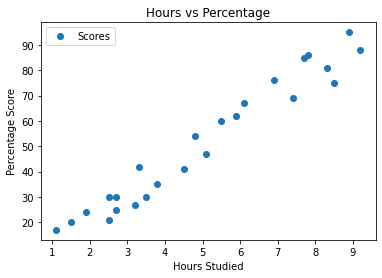

In [10]:
#plotting the distribution of scores
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

we can clearly see there is an relation between hours studied and percentage score


**Lets make some visulaisation to understand data deeply**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


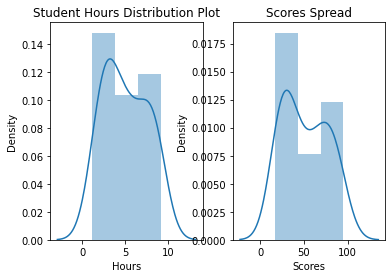

In [11]:
#visualising data
plt.subplot(1,2,1)
plt.title('Student Hours Distribution Plot')
sns.distplot(df.Hours)

plt.subplot(1,2,2)
plt.title('Scores Spread')
sns.distplot(df.Scores)

plt.show()


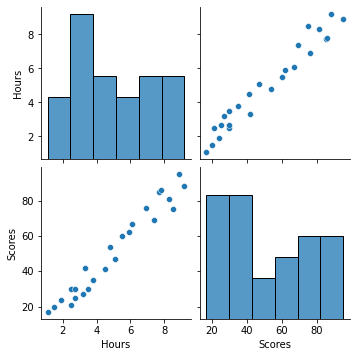

In [12]:
#plotting relations to the dataset
sns.pairplot(df)
plt.show()

In [14]:
#X and Y arrays
X=df['Hours']
Y=df['Scores']

In [15]:
# Spliting data by test-train
train_data, test_data, train_labels, test_labels= train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=0)

In [16]:
#to check the training and testing data shapes
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(20,)
(5,)
(20,)
(5,)


In [30]:
a=pd.DataFrame(train_data)
b=a.values.reshape(-1,1)
train_data=pd.DataFrame(b)
a=pd.DataFrame(test_data)
b=a.values.reshape(-1,1)
test_data=pd.DataFrame(b)

**Defining a Machine Learning Model**

In [35]:
train_data

,0
0,3.8
1,1.9
2,7.8
3,6.9
4,1.1
5,5.1
6,7.7
7,3.3
8,8.3
9,9.2


In [36]:
train_labels

22    35
17    24
24    86
23    76
14    17
1     47
10    85
13    42
8     81
6     88
18    67
4     30
9     25
7     60
20    30
3     75
0     21
21    54
15    95
12    41
Name: Scores, dtype: int64

In [17]:
#Performing linear regression
lr=LinearRegression()
lr.fit(train_data,train_labels)
print('training complete')

training complete


2.018160041434662
[9.91065648]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


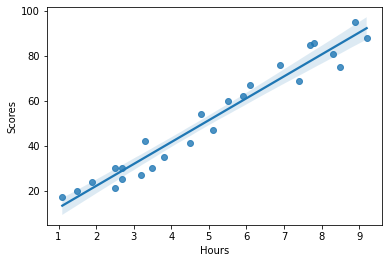

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [18]:
#printing intercept and coefficient
print(lr.intercept_)
print(lr.coef_)
#to plot regression plot
sns.regplot(X,Y)
plt.show()
print(df.corr())

**Making predictions on test data**

In [19]:
print(test_data)

     0
0  1.5
1  3.2
2  7.4
3  2.5
4  5.9


In [20]:
test_prediction=lr.predict(test_data)
test_prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [21]:
df_data=pd.DataFrame({'Actual':test_labels,'predicted':test_prediction})
df_data

,Actual,predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# **EVALUATING MODEL**


In [ ]:
#evaluating model
print("Mean Absolute Error:",m.mean_absolute_error(test_labels,test_prediction))
print("Mean Squared Error:",m.mean_squared_error(test_labels,test_prediction))


Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456


# **CONCLUSION**

In [22]:
#What will  be predicted if a student study 9.25 hours/day
hours=[[9.25]]
pred_scores=lr.predict(hours)
print('Predicted score is:',pred_scores)

Predicted score is: [93.69173249]


**According to regression model, if a student studies 9.25 hours per day then he is likely to score 93.69 marks.**